In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Downloads/influencer_list.csv') 
data.head(5)

link   username   type likes_views  \
0  https://www.instagram.com/p/CELL_kAAdb_/  henjiwong  video      54,958   
1  https://www.instagram.com/p/CEI8cMagKOb/  henjiwong  video      16,651   
2  https://www.instagram.com/p/CEInTOXgGak/  henjiwong  video      61,829   
3  https://www.instagram.com/p/CEGCeoalCmp/  henjiwong  video     233,467   
4  https://www.instagram.com/p/CEEKTLcgbrk/  henjiwong  video      47,487   

   age     post_date                 post_time  \
0   1h  Aug 22, 2020  2020-08-22T03:26:10.000Z   
1  22h  Aug 21, 2020  2020-08-21T06:38:46.000Z   
2  23h  Aug 21, 2020  2020-08-21T05:28:04.000Z   
3  13h  Aug 21, 2020  2020-08-21T14:58:49.000Z   
4   2d  Aug 19, 2020  2020-08-19T14:50:17.000Z   

                                             comment  \
0  DESSERT BOX BY NAJLA CADBURY\n-\n-\nYukkk biki...   
1  PANDAN SERIES!!\n-\n-\nWah yang suka wangi pan...   
2  MOCHI ANAK KOS\n-\n-\nSbnarnya mau kasi resep ...   
3  Japanese Souffle Cheesecake TANPA Cream Cheese...   
4  CEMILAN SEHAT DULU YUKK!!\n-\n-\nKali ini kita...   

                                            hashtags        mentions  
0                                                NaN             NaN  
1  ['#BobaSatuIndonesia', '#Tablesituation', '#on...           @bube  
2  ['#Tablesituation', '#onthetableproject', '#lo...             NaN  
3                                                NaN             NaN  
4                                                NaN  @infosuperindo

# Data Cleansing

In [3]:
from gensim import utils
import gensim.parsing.preprocessing as gsp

filters = [
           gsp.strip_punctuation,
           gsp.strip_multiple_whitespaces,
           gsp.strip_numeric,
           gsp.strip_short
          ]

def clean_text(s):
    s = s.lower()
    s = utils.to_unicode(s)
    for f in filters:
        s = f(s)
    return s

In [4]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
 
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
print(stopwords)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [78]:
generic_words = ['buat','nya','aja','sdm','gue','kalian','pake','kalau','banget','hingga','resep','pakai','video',
                 'trus','bikin','youtube','pas','mau','link','sdt','nih','mereka','enak','menit','sih','biar','jadi',
                 'tutorial','postingan','ya','ini','cek','udah','gak','cookingwithhel','cek','klik','bio','penasaran',
                 'penjelasan','sekarang','soalnya','kali','yah','sesuai','kali','suka','klo','cuma','hungryfever','jangan',
                 'bahan','klo','lebih','rata','cara','kalo','jdi','lbh','semua','aku','cobain','https','masak','rasa',
                 'baru','coba','panas','masukan','langsung','selamat','anak','sedikit','devina','hermawan','youtube',
                 'banyak','sama','paling','apa','kan','nah','check','out','with','yackikuka','hel', 'lengkapnya', 
                 'selengkapnya', 'cari','store','xanderskitchen','full','available','dlm','dalam','keadaan','sehat'
                ]
exclusions = []
exclusions.extend(generic_words)
exclusions.extend(stopwords)

In [6]:
data['title'] = data['comment'].apply(lambda st: st[:st.find("\n")])
data['title'] = data['title'].str.lower()
data['title'] = data['title'].map(lambda x: clean_text(x))

In [7]:
data['title'] = data['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (exclusions)]))

In [8]:
# data['title'] = data['comment'].apply(lambda st: st[:st.find(",")])
# data['title'] = data['title'].apply(lambda st: st[:st.find(".")])
# data['title'] = data['title'].apply(lambda st: st[:st.find("\n")])

# Cleaning Hashtags and Mentions from Captions

In [9]:
import numpy as np
data['hashtags'] = data['hashtags'].astype(str)
data['clean_tag'] = data['hashtags'].apply(lambda st: st[1:st.find("]")])
data['clean_tag'] = data['clean_tag'].apply(lambda st: list(st.split(",")))
data

link        username   type  \
0    https://www.instagram.com/p/CELL_kAAdb_/       henjiwong  video   
1    https://www.instagram.com/p/CEI8cMagKOb/       henjiwong  video   
2    https://www.instagram.com/p/CEInTOXgGak/       henjiwong  video   
3    https://www.instagram.com/p/CEGCeoalCmp/       henjiwong  video   
4    https://www.instagram.com/p/CEEKTLcgbrk/       henjiwong  video   
..                                        ...             ...    ...   
355  https://www.instagram.com/p/CBAiMQjBOej/  xanderskitchen  photo   
356  https://www.instagram.com/p/CAmeqGVhLRN/  xanderskitchen  photo   
357  https://www.instagram.com/p/CAjs0d6hz0S/  xanderskitchen  photo   
358  https://www.instagram.com/p/CAh3pnGBLjB/  xanderskitchen  video   
359  https://www.instagram.com/p/CAhl_ZohF6u/  xanderskitchen  video   

    likes_views  age     post_date                 post_time  \
0        54,958   1h  Aug 22, 2020  2020-08-22T03:26:10.000Z   
1        16,651  22h  Aug 21, 2020  2020-08-21T06:38:46.000Z   
2        61,829  23h  Aug 21, 2020  2020-08-21T05:28:04.000Z   
3       233,467  13h  Aug 21, 2020  2020-08-21T14:58:49.000Z   
4        47,487   2d  Aug 19, 2020  2020-08-19T14:50:17.000Z   
..          ...  ...           ...                       ...   
355       5,531  11w   Jun 5, 2020  2020-06-05T00:15:01.000Z   
356       2,840  12w  May 26, 2020  2020-05-26T01:34:40.000Z   
357       8,932  12w  May 25, 2020  2020-05-25T14:15:06.000Z   
358      38,251  12w  May 23, 2020  2020-05-23T13:18:59.000Z   
359     119,851  12w  May 26, 2020  2020-05-26T05:03:42.000Z   

                                               comment  \
0    DESSERT BOX BY NAJLA CADBURY\n-\n-\nYukkk biki...   
1    PANDAN SERIES!!\n-\n-\nWah yang suka wangi pan...   
2    MOCHI ANAK KOS\n-\n-\nSbnarnya mau kasi resep ...   
3    Japanese Souffle Cheesecake TANPA Cream Cheese...   
4    CEMILAN SEHAT DULU YUKK!!\n-\n-\nKali ini kita...   
..                                                 ...   
355  Soree .... bikin mie godog nyemek2 ...mayan en...   
356  .\n.\nKemarin saya tidur cepat , di WA jam 8 m...   
357  .\n.\nSelamat Hari Raya Idul Fitri . Mohon maa...   
358  .\n.\nMohon maaf lahir dan batin ya teman2 🙏🙏🙏...   
359  .\n.\nLebaran juga yaa 🤣 Tadi pagi2 mba ke pas...   

                                              hashtags         mentions  \
0                                                  nan              NaN   
1    ['#BobaSatuIndonesia', '#Tablesituation', '#on...            @bube   
2    ['#Tablesituation', '#onthetableproject', '#lo...              NaN   
3                                                  nan              NaN   
4                                                  nan   @infosuperindo   
..                                                 ...              ...   
355                              #xanderskitchenrecipe              NaN   
356                                                nan  @xanderskitchen   
357                                                nan              NaN   
358                                                nan              NaN   
359                                                nan              NaN   

                                                 title  \
0                            dessert box najla cadbury   
1                                        pandan series   
2                                            mochi kos   
3             japanese souffle cheesecake cream cheese   
4                              cemilan sehat dulu yukk   
..                                                 ...   
355  soree mie godog nyemek mayan sepotong dada aya...   
356                                                      
357                                                      
358                                                      
359                                                      

                                             clean_tag  
0                                                  [a] 

In [79]:
df_tag = pd.DataFrame()

df_tag['link'] = data['link']
df_tag['hashtags'] = data['hashtags'].str.replace('[','').str.replace(']','').str.replace("'","")

from itertools import chain

genres = df_tag['hashtags'].str.split(', ')
df_tag = pd.DataFrame({
    'link' : df_tag['link'].values.repeat(genres.str.len()),
    'tags' : list(chain.from_iterable(genres.tolist()))
})

hashtag_list = df_tag['tags'].tolist()

In [80]:
exclusions.extend(hashtag_list)

In [81]:
hashtag_list_unique = []

for x in hashtag_list:
    if x not in hashtag_list:
        hashtag_list_unique.append(x)
        
exclusions.extend(hashtag_list_unique)

In [82]:
df_mention = pd.DataFrame()

df_mention['link'] = data['link']
df_mention['mentions'] = data['mentions'].str.replace('[','').str.replace(']','').str.replace("'","")
df_mention

mention_list = df_mention['mentions'].tolist()
mention_list_unique = []

for x in hashtag_list:
    if x not in hashtag_list:
        mention_list_unique.append(x)
        
exclusions.extend(mention_list_unique)

In [14]:
# Convert Likes to Integer
data['likes'] = data['likes_views'].str.replace(',','').astype(int)

# Extract simplified title
import pandas as pd
import re

result_list = []

for value in data.title.values:
    non_data = re.split('Data|data', value) # split text removing "data"
    terms_list = [term for term in non_data if len(term) > 0] # skip empty terms
    substrs = [term.split()[0:6] for term in terms_list]  # slice and grab first three terms
    result = [' '.join(term) for term in substrs] # combine the terms back into substrings
    result_list.append(result)

data['title_simp'] = result_list
data['title_simp'] = data['title_simp'].astype(str).str.replace('[','').str.replace(']','').str.replace('"','').str.replace("'","")
data

link        username   type  \
0    https://www.instagram.com/p/CELL_kAAdb_/       henjiwong  video   
1    https://www.instagram.com/p/CEI8cMagKOb/       henjiwong  video   
2    https://www.instagram.com/p/CEInTOXgGak/       henjiwong  video   
3    https://www.instagram.com/p/CEGCeoalCmp/       henjiwong  video   
4    https://www.instagram.com/p/CEEKTLcgbrk/       henjiwong  video   
..                                        ...             ...    ...   
355  https://www.instagram.com/p/CBAiMQjBOej/  xanderskitchen  photo   
356  https://www.instagram.com/p/CAmeqGVhLRN/  xanderskitchen  photo   
357  https://www.instagram.com/p/CAjs0d6hz0S/  xanderskitchen  photo   
358  https://www.instagram.com/p/CAh3pnGBLjB/  xanderskitchen  video   
359  https://www.instagram.com/p/CAhl_ZohF6u/  xanderskitchen  video   

    likes_views  age     post_date                 post_time  \
0        54,958   1h  Aug 22, 2020  2020-08-22T03:26:10.000Z   
1        16,651  22h  Aug 21, 2020  2020-08-21T06:38:46.000Z   
2        61,829  23h  Aug 21, 2020  2020-08-21T05:28:04.000Z   
3       233,467  13h  Aug 21, 2020  2020-08-21T14:58:49.000Z   
4        47,487   2d  Aug 19, 2020  2020-08-19T14:50:17.000Z   
..          ...  ...           ...                       ...   
355       5,531  11w   Jun 5, 2020  2020-06-05T00:15:01.000Z   
356       2,840  12w  May 26, 2020  2020-05-26T01:34:40.000Z   
357       8,932  12w  May 25, 2020  2020-05-25T14:15:06.000Z   
358      38,251  12w  May 23, 2020  2020-05-23T13:18:59.000Z   
359     119,851  12w  May 26, 2020  2020-05-26T05:03:42.000Z   

                                               comment  \
0    DESSERT BOX BY NAJLA CADBURY\n-\n-\nYukkk biki...   
1    PANDAN SERIES!!\n-\n-\nWah yang suka wangi pan...   
2    MOCHI ANAK KOS\n-\n-\nSbnarnya mau kasi resep ...   
3    Japanese Souffle Cheesecake TANPA Cream Cheese...   
4    CEMILAN SEHAT DULU YUKK!!\n-\n-\nKali ini kita...   
..                                                 ...   
355  Soree .... bikin mie godog nyemek2 ...mayan en...   
356  .\n.\nKemarin saya tidur cepat , di WA jam 8 m...   
357  .\n.\nSelamat Hari Raya Idul Fitri . Mohon maa...   
358  .\n.\nMohon maaf lahir dan batin ya teman2 🙏🙏🙏...   
359  .\n.\nLebaran juga yaa 🤣 Tadi pagi2 mba ke pas...   

                                              hashtags         mentions  \
0                                                  nan              NaN   
1    ['#BobaSatuIndonesia', '#Tablesituation', '#on...            @bube   
2    ['#Tablesituation', '#onthetableproject', '#lo...              NaN   
3                                                  nan              NaN   
4                                                  nan   @infosuperindo   
..                                                 ...              ...   
355                              #xanderskitchenrecipe              NaN   
356                                                nan  @xanderskitchen   
357                                                nan              NaN   
358                                                nan              NaN   
359                                                nan              NaN   

                                                 title  \
0                            dessert box najla cadbury   
1                                        pandan series   
2                                            mochi kos   
3             japanese souffle cheesecake cream cheese   
4                              cemilan sehat dulu yukk   
..                                                 ...   
355  soree mie godog nyemek mayan sepotong dada aya...   
356                                                      
357                                                      
358                                                      
359                                                      

                                             clean_tag   likes  \
0                                             

# Top Likes and Views

In [15]:
data_video = data.query('type == "video"')
data_photo = data.query('type == "photo"')

Text(0.5, 1.0, 'Videos Views Distribution')

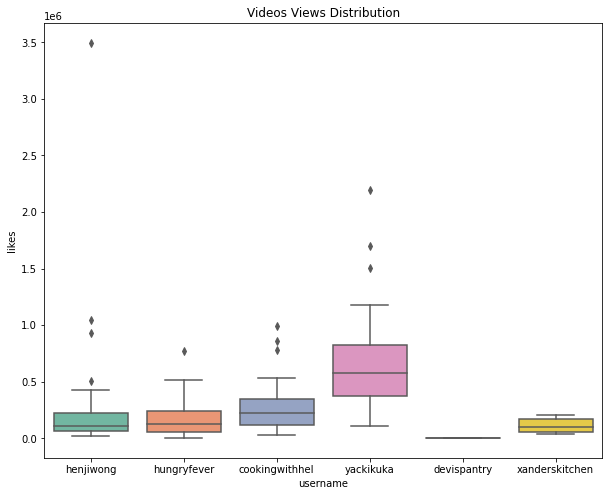

In [16]:
f, ax = plt.subplots(figsize=(10, 8))

sns.boxplot(x="username", y="likes", data=data_video, palette="Set2")
ax.set_title('Videos Views Distribution')

Text(0.5, 1.0, 'Photos Likes Distribution')

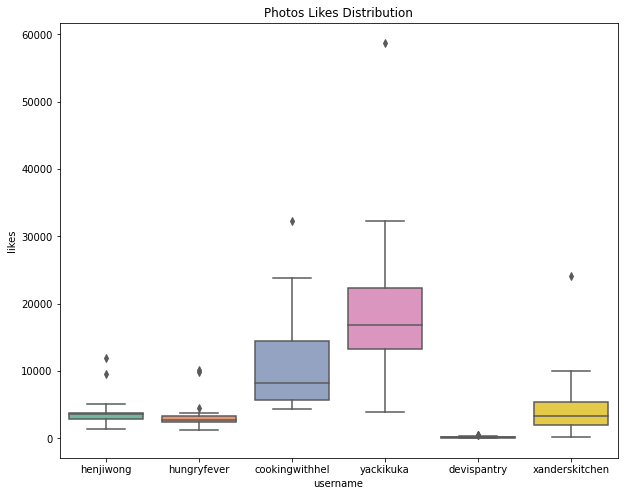

In [17]:
f, ax = plt.subplots(figsize=(10, 8))

sns.boxplot(x="username", y="likes", data=data_photo, palette="Set2")
ax.set_title('Photos Likes Distribution')

Text(0.5, 1.0, 'Videos with Highest Views')

/anaconda3/envs/personal_exp/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9729 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/anaconda3/envs/personal_exp/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65039 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/anaconda3/envs/personal_exp/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 10084 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/anaconda3/envs/personal_exp/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128513 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/anaconda3/envs/personal_exp/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129315 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/anaconda3/envs/personal_exp/lib/python3.8/site-packag

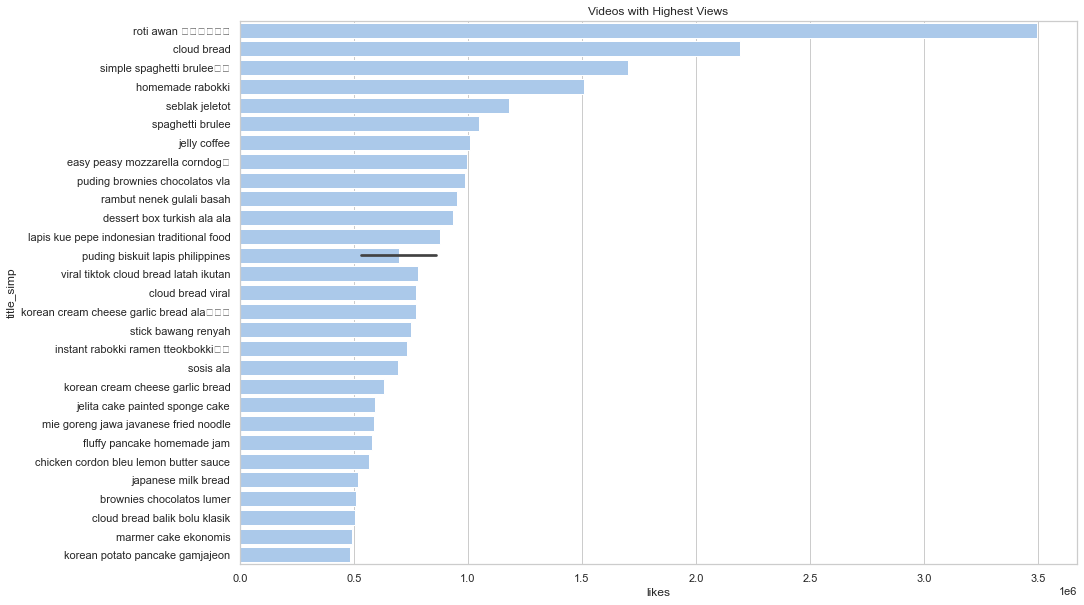

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

#Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Load the example car crash dataset
data_likes = data_video.sort_values("likes", ascending=False).head(30)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="likes", y="title_simp", data=data_likes,
            label="Total Likes/Views", color="b")

ax.set_title('Videos with Highest Views')

Text(0.5, 1.0, 'Photos with Highest Likes')

/anaconda3/envs/personal_exp/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128541 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/anaconda3/envs/personal_exp/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128518 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/anaconda3/envs/personal_exp/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128541 missing from current font.
  font.set_text(s, 0, flags=flags)
/anaconda3/envs/personal_exp/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128518 missing from current font.
  font.set_text(s, 0, flags=flags)


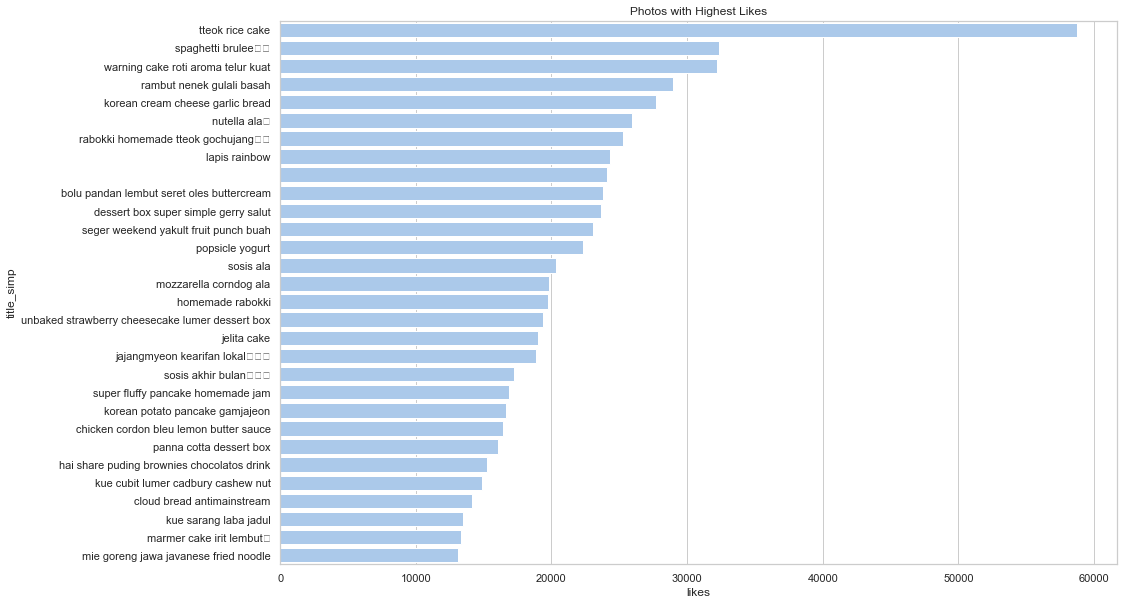

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

#Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Load the example car crash dataset
data_likes = data_photo.sort_values("likes", ascending=False).head(30)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="likes", y="title_simp", data=data_likes,
            label="Total Likes/Views", color="b")

ax.set_title('Photos with Highest Likes')

Text(0.5, 1.0, 'Videos with Lowest Views')

/anaconda3/envs/personal_exp/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 10024 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/anaconda3/envs/personal_exp/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/anaconda3/envs/personal_exp/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127887 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/anaconda3/envs/personal_exp/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127471 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/anaconda3/envs/personal_exp/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127477 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/anaconda3/envs/personal_exp/lib/python3.8/site-pac

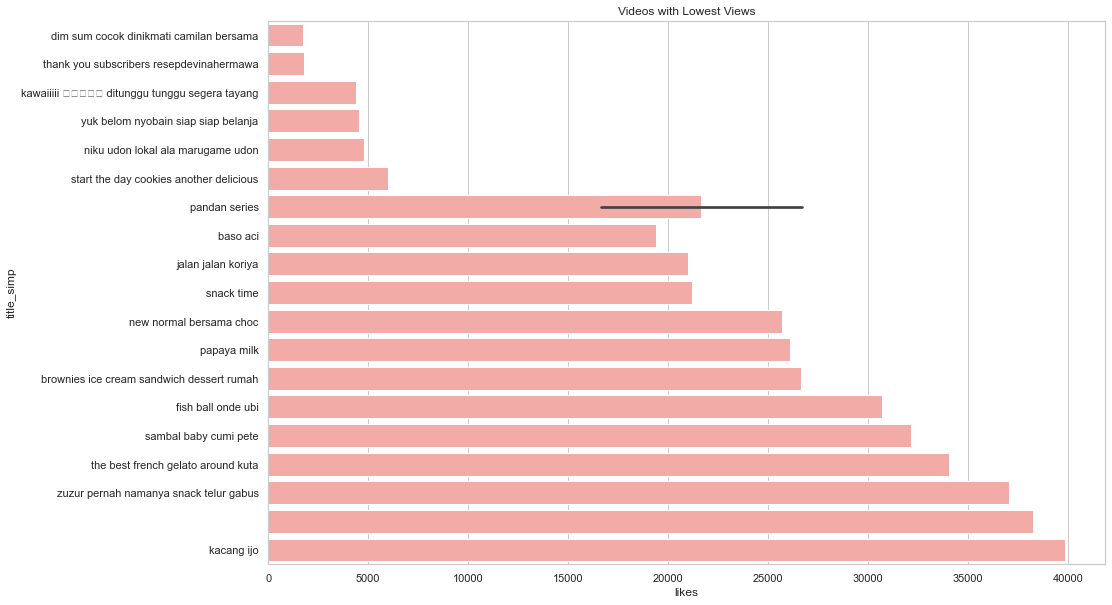

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

#Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Load the example car crash dataset
data_likes = data_video.sort_values("likes", ascending=True).head(20)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="likes", y="title_simp", data=data_likes,
            label="Total Likes/Views", color="r")

ax.set_title('Videos with Lowest Views')

Text(0.5, 0, 'Total Likes/Views')

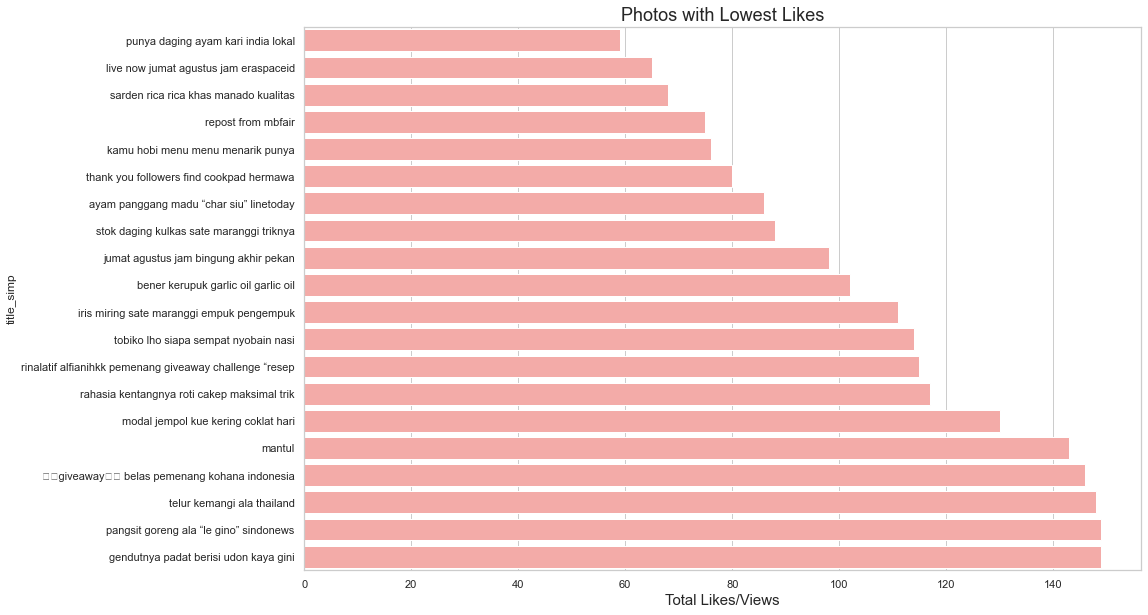

In [206]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

#Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Load the example car crash dataset
data_likes = data_photo.sort_values("likes", ascending=True).head(20)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="likes", y="title_simp", data=data_likes,
            label="Total Likes/Views", color="r")

ax.set_title('Photos with Lowest Likes', fontsize=18)
ax.set_xlabel("Total Likes/Views", fontsize=15)

# Timeseries Trends

In [224]:
timeseries = pd.DataFrame()
timeseries = data[['post_date','post_time','link','username','type']]

In [226]:
timeseries['post_date'] = pd.to_datetime(timeseries['post_date'])
timeseries['post_time'] = pd.to_datetime(timeseries['post_time'])
timeseries

<ipython-input-226-51da2a8fb9fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timeseries['post_date'] = pd.to_datetime(timeseries['post_date'])
<ipython-input-226-51da2a8fb9fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timeseries['post_time'] = pd.to_datetime(timeseries['post_time'])


post_date                 post_time  \
0   2020-08-22 2020-08-22 03:26:10+00:00   
1   2020-08-21 2020-08-21 06:38:46+00:00   
2   2020-08-21 2020-08-21 05:28:04+00:00   
3   2020-08-21 2020-08-21 14:58:49+00:00   
4   2020-08-19 2020-08-19 14:50:17+00:00   
..         ...                       ...   
355 2020-06-05 2020-06-05 00:15:01+00:00   
356 2020-05-26 2020-05-26 01:34:40+00:00   
357 2020-05-25 2020-05-25 14:15:06+00:00   
358 2020-05-23 2020-05-23 13:18:59+00:00   
359 2020-05-26 2020-05-26 05:03:42+00:00   

                                         link        username   type  
0    https://www.instagram.com/p/CELL_kAAdb_/       henjiwong  video  
1    https://www.instagram.com/p/CEI8cMagKOb/       henjiwong  video  
2    https://www.instagram.com/p/CEInTOXgGak/       henjiwong  video  
3    https://www.instagram.com/p/CEGCeoalCmp/       henjiwong  video  
4    https://www.instagram.com/p/CEEKTLcgbrk/       henjiwong  video  
..                                        ...             ...    ...  
355  https://www.instagram.com/p/CBAiMQjBOej/  xanderskitchen  photo  
356  https://www.instagram.com/p/CAmeqGVhLRN/  xanderskitchen  photo  
357  https://www.instagram.com/p/CAjs0d6hz0S/  xanderskitchen  photo  
358  https://www.instagram.com/p/CAh3pnGBLjB/  xanderskitchen  video  
359  https://www.instagram.com/p/CAhl_ZohF6u/  xanderskitchen  video  

[360 rows x 5 columns]

In [227]:
timeseries['week_start_date'] = timeseries['post_date'] - pd.to_timedelta(timeseries['post_date'].dt.dayofweek, unit='d')
timeseries

<ipython-input-227-e9d5baaceaf1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timeseries['week_start_date'] = timeseries['post_date'] - pd.to_timedelta(timeseries['post_date'].dt.dayofweek, unit='d')


post_date                 post_time  \
0   2020-08-22 2020-08-22 03:26:10+00:00   
1   2020-08-21 2020-08-21 06:38:46+00:00   
2   2020-08-21 2020-08-21 05:28:04+00:00   
3   2020-08-21 2020-08-21 14:58:49+00:00   
4   2020-08-19 2020-08-19 14:50:17+00:00   
..         ...                       ...   
355 2020-06-05 2020-06-05 00:15:01+00:00   
356 2020-05-26 2020-05-26 01:34:40+00:00   
357 2020-05-25 2020-05-25 14:15:06+00:00   
358 2020-05-23 2020-05-23 13:18:59+00:00   
359 2020-05-26 2020-05-26 05:03:42+00:00   

                                         link        username   type  \
0    https://www.instagram.com/p/CELL_kAAdb_/       henjiwong  video   
1    https://www.instagram.com/p/CEI8cMagKOb/       henjiwong  video   
2    https://www.instagram.com/p/CEInTOXgGak/       henjiwong  video   
3    https://www.instagram.com/p/CEGCeoalCmp/       henjiwong  video   
4    https://www.instagram.com/p/CEEKTLcgbrk/       henjiwong  video   
..                                        ...             ...    ...   
355  https://www.instagram.com/p/CBAiMQjBOej/  xanderskitchen  photo   
356  https://www.instagram.com/p/CAmeqGVhLRN/  xanderskitchen  photo   
357  https://www.instagram.com/p/CAjs0d6hz0S/  xanderskitchen  photo   
358  https://www.instagram.com/p/CAh3pnGBLjB/  xanderskitchen  video   
359  https://www.instagram.com/p/CAhl_ZohF6u/  xanderskitchen  video   

    week_start_date  
0        2020-08-17  
1        2020-08-17  
2        2020-08-17  
3        2020-08-17  
4        2020-08-17  
..              ...  
355      2020-06-01  
356      2020-05-25  
357      2020-05-25  
358      2020-05-18  
359      2020-05-25  

[360 rows x 6 columns]

In [232]:
timeseries_week = timeseries.groupby(['username','week_start_date']).link.count().reset_index()
timeseries_week.head()

username week_start_date  link
0  cookingwithhel      2020-07-13     5
1  cookingwithhel      2020-07-20     7
2  cookingwithhel      2020-07-27    13
3  cookingwithhel      2020-08-03    16
4  cookingwithhel      2020-08-10    10

Text(0.5, 1.0, 'Total Posts by Accounts')

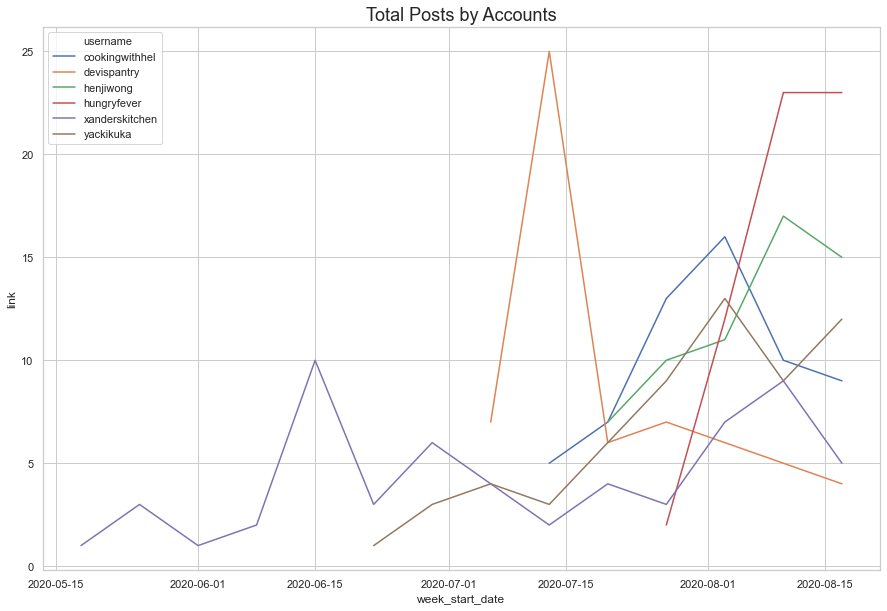

In [240]:
#Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))
sns.set_color_codes("pastel")

ax = sns.lineplot(x="week_start_date", y="link",hue="username", data=timeseries_week)

ax.set_title('Total Posts by Accounts', fontsize=18)
# ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

In [241]:
timeseries_type = timeseries.groupby(['type','week_start_date']).link.count().reset_index()
timeseries_type.head()

type week_start_date  link
0  photo      2020-05-25     2
1  photo      2020-06-01     1
2  photo      2020-06-08     2
3  photo      2020-06-15    10
4  photo      2020-06-22     4

Text(0.5, 1.0, 'Total Posts by Type')

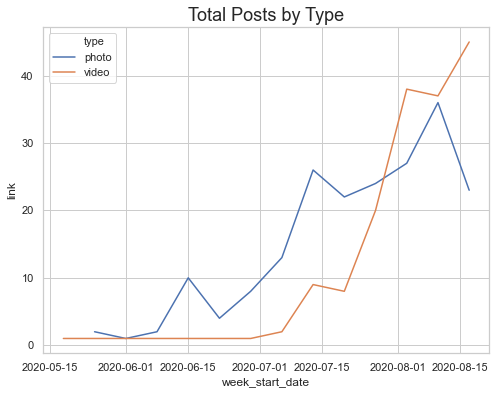

In [252]:
#Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))
sns.set_color_codes("pastel")

ax = sns.lineplot(x="week_start_date", y="link",hue="type", data=timeseries_type)

ax.set_title('Total Posts by Type', fontsize=18)
# ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

# Common Words

In [83]:
data['clean'] = data['comment'].apply(lambda x: ' '.join([word for word in x.split() if word not in (exclusions)]))
data['clean'] = data['clean'].str.lower()
data['clean'] = data['clean'].map(lambda x: clean_text(x))

In [84]:
data['clean'] = data['clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (exclusions)]))

In [85]:
from collections import Counter

aggregate_counter = Counter()
for row_index,row in data.iterrows():
    c = Counter(row['clean'].split())
    aggregate_counter += c

common_words = [word[0] for word in aggregate_counter.most_common(50)]
common_words_counts = [word[1] for word in aggregate_counter.most_common(50)]

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

def barplot(words, words_counts, title):
    fig = plt.figure(figsize=(18,6))
    bar_plot = sns.barplot(x=words, y=words_counts)
    for item in bar_plot.get_xticklabels():
        item.set_rotation(90)
#     plt.title(title)
    plt.show()

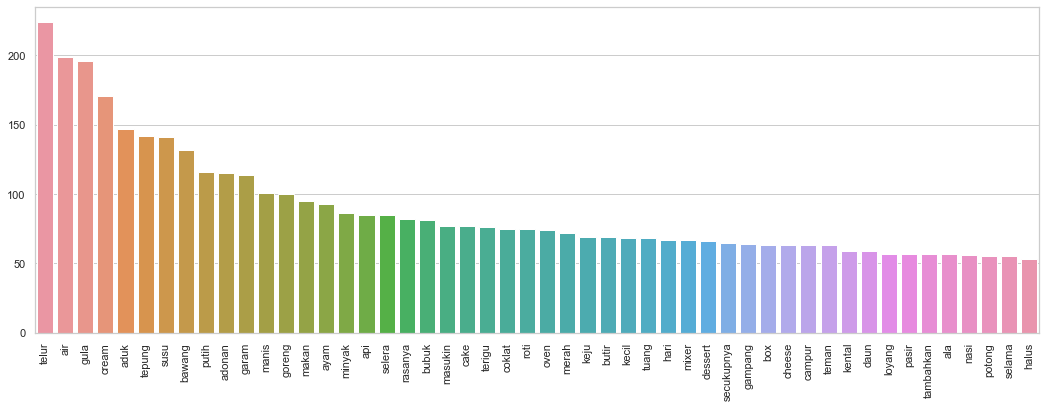

In [87]:
barplot(words=common_words, words_counts=common_words_counts, title="Most Frequent Phrase")

In [88]:
wordbank = data['clean'].unique()

wordbank

array(['dessert box najla cadbury yukkk dessert box persiapan malam minggu dessert box cadbury cakenya moist wajib satu maaf videonya cepet waktunya cukup hhaha gambang buatnya banyk printilan kecil ganache whipped cream cair cream gpp kemudian ngukusnya biasa tutupan pengukusnya ditutup kain dessert box cakenya loyang potong kejunya sendiri sbnarnya harusnya cream cheese keju oles karna pakein quick melt parut menunggu ganache dingin masukin dessert box kulkas set bru tuang coklatnya harusnya isian karna kmrn nyari kosong black forest kemudian ganachenya merasa kurang banyk tambhin campurin ama coklat compound ganachenya masuk kulkas kental butir telur gula pasir vanilla aduk gula larut telur pucat susu kental manis aduk masukin kering tepung terigu cocoa powder baking soda bakinh powder sejumput garam aduk susu cream aduk minyak sayur aduk masukin kopi ampas air aduk tuang loyang hentakkan beberapa kukus api sedang selama penutup ditutup kain potong wadah siapkan cadbury potong kecil

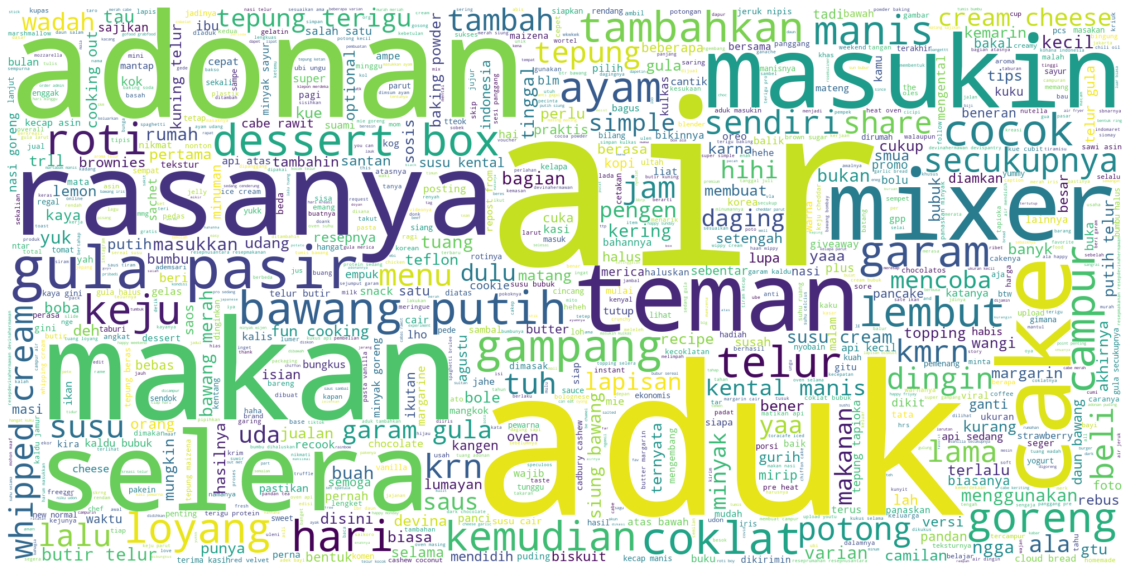

In [89]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# build a word cloud
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=1000, width=2000, height=1000).generate(' '.join(str(word) for word in wordbank))

# display the word cloud

fig = plt.figure()
fig.set_figwidth(20) # set width
fig.set_figheight(20) # set height

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# N-gram Wordcloud

In [90]:
from sklearn.feature_extraction.text import CountVectorizer

word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(data['clean'])
frequencies = sum(sparse_matrix).toarray()[0]

In [91]:
freqs = [(word, sparse_matrix.getcol(idx).sum()) for word, idx in word_vectorizer.vocabulary_.items()]

In [92]:
df_bigram = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
df_bigram.sort_values('frequency',ascending=False).head(5)

frequency
gula pasir            57
bawang putih          56
dessert box           52
whipped cream         45
tepung terigu         40

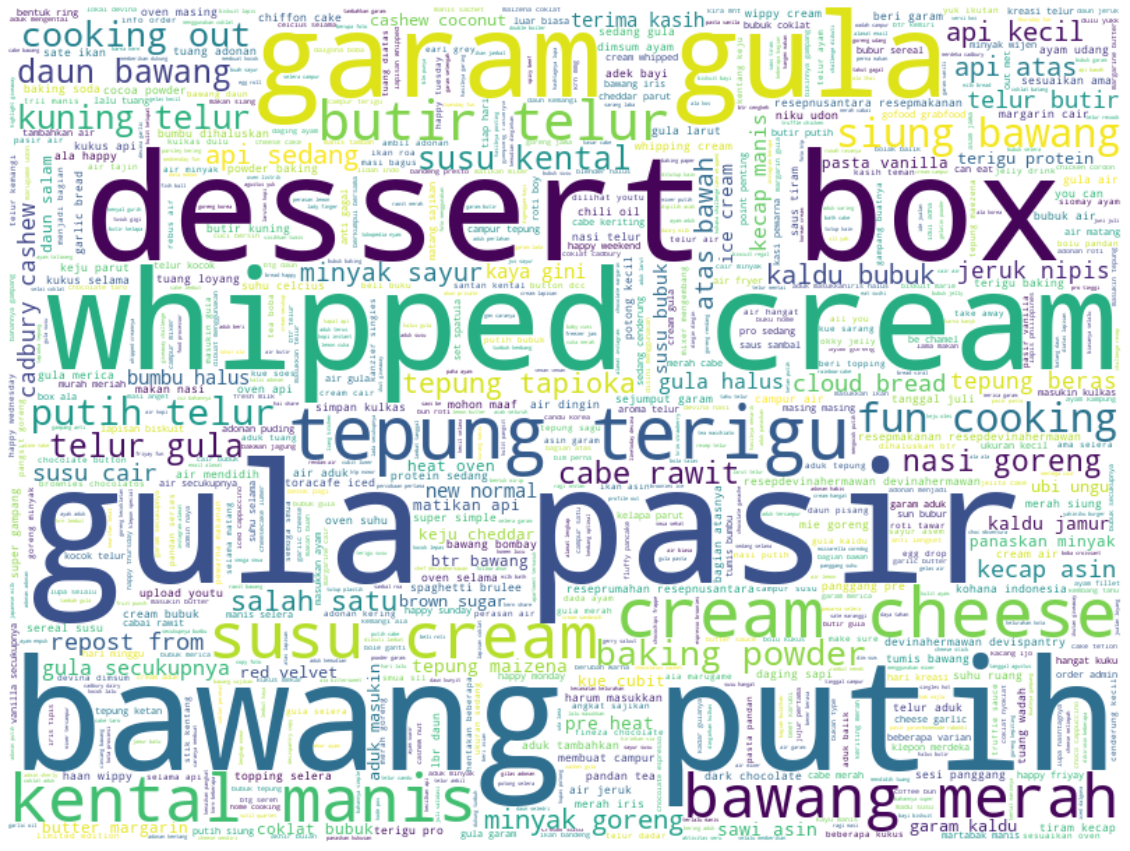

In [93]:
# build a word cloud
w = WordCloud(width=800,height=600,mode='RGBA',background_color='white',max_words=2000).generate_from_frequencies(df_bigram.frequency)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(20) # set width
fig.set_figheight(20) # set height

plt.imshow(w, interpolation='bilinear')
plt.axis('off')
plt.show()

In [94]:
from sklearn.feature_extraction.text import CountVectorizer

word_vectorizer = CountVectorizer(ngram_range=(3,3), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(data['clean'])
frequencies = sum(sparse_matrix).toarray()[0]

df_trigram = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])

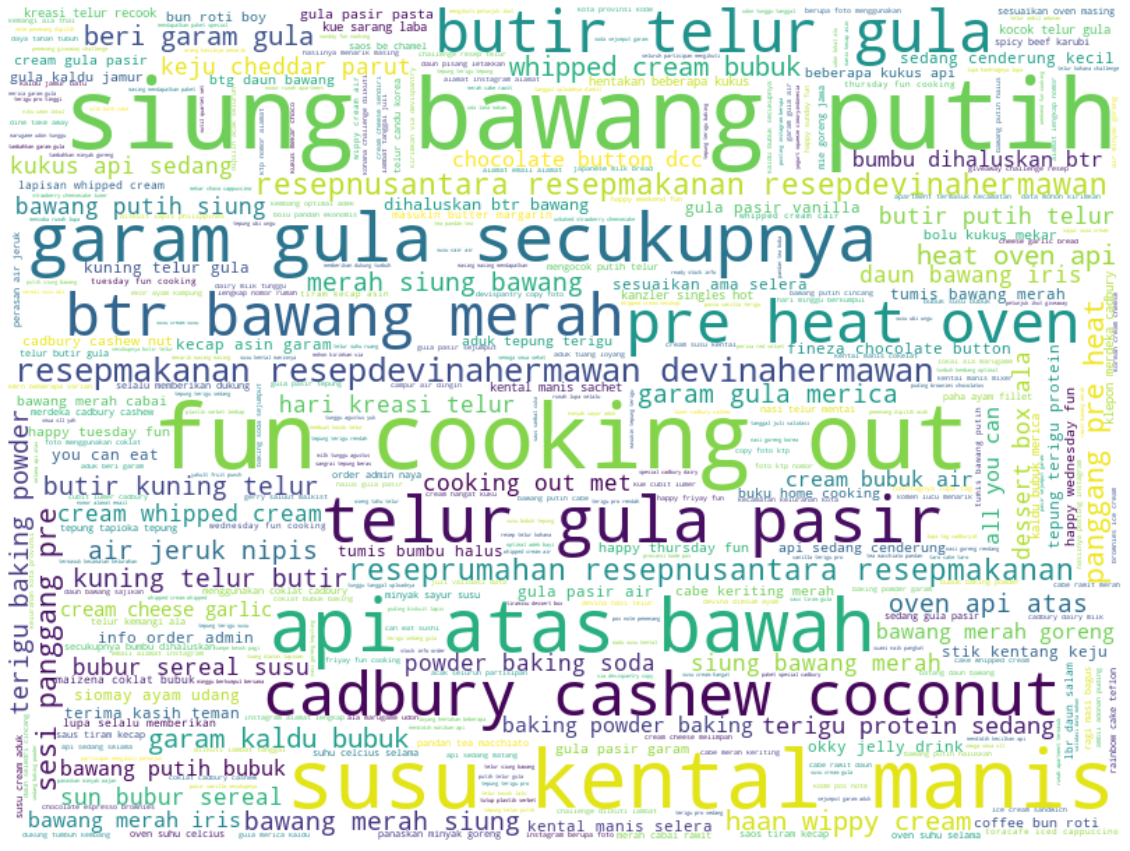

In [95]:
# build a word cloud
w = WordCloud(width=800,height=600,mode='RGBA',background_color='white',max_words=2000).generate_from_frequencies(df_trigram.frequency)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(20) # set width
fig.set_figheight(20) # set height

plt.imshow(w, interpolation='bilinear')
plt.axis('off')
plt.show()

# Improve Viz

In [97]:
import PIL.Image
from pylab import *

Image opened and saved!


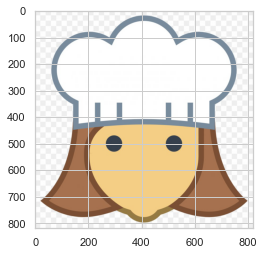

In [176]:
# open image (just make sure it's in your working directory) and save mask to book

mic = np.array(PIL.Image.open('cook2.jpg'))

imshow(mic)

print('Image opened and saved!')

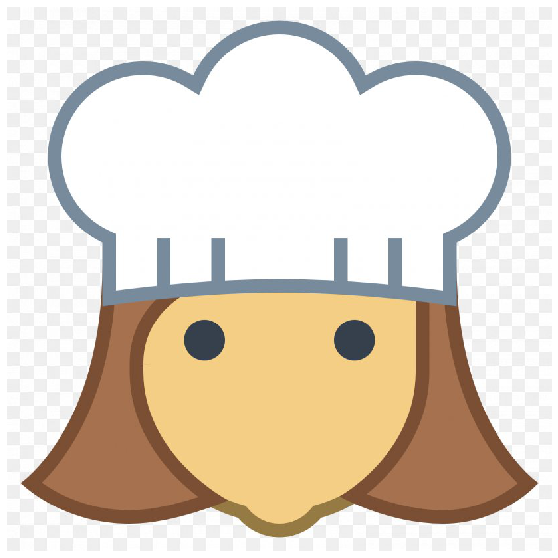

In [177]:
# display mask image

fig = plt.figure()
fig.set_figwidth(10) # set width
fig.set_figheight(10) # set height

plt.imshow(mic, cmap=plt.cm.gray, interpolation='None')
plt.axis('off')
plt.show()

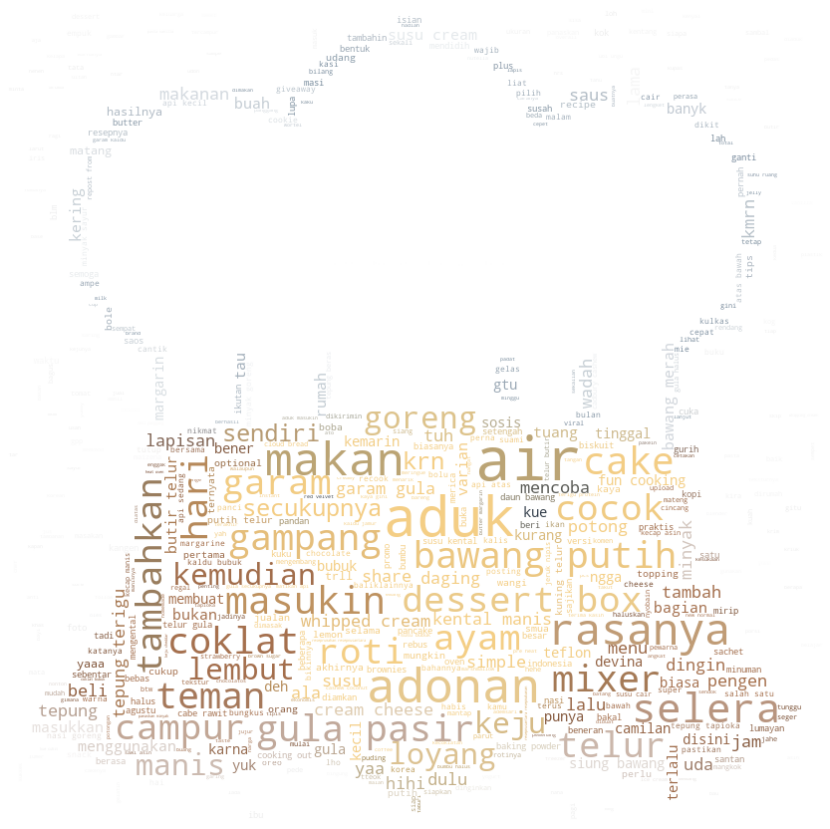

In [178]:
# create a beautiful wordcloud

stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white", max_words=3000, mask=mic,
               stopwords=stopwords, max_font_size=60, random_state=42)
# generate word cloud
wc.generate(' '.join(wordbank))

# create coloring from image
image_colors = ImageColorGenerator(mic)

# show
plt.figure(figsize=(15, 15))

# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")

plt.axis('off')

plt.show()

Image opened and saved!


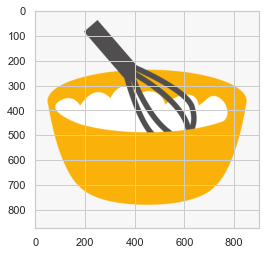

In [201]:
# open image (just make sure it's in your working directory) and save mask to book

mic2 = np.array(PIL.Image.open('mix.png'))

imshow(mic2)

print('Image opened and saved!')

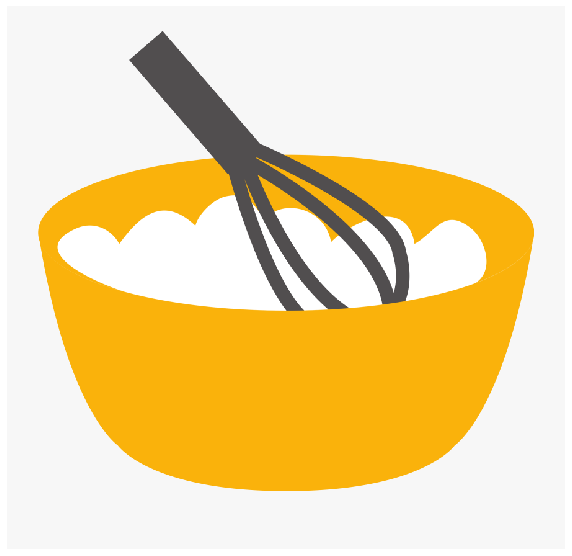

In [202]:
# display mask image

fig = plt.figure()
fig.set_figwidth(10) # set width
fig.set_figheight(10) # set height

plt.imshow(mic2, cmap=plt.cm.gray, interpolation='None')
plt.axis('off')
plt.show()

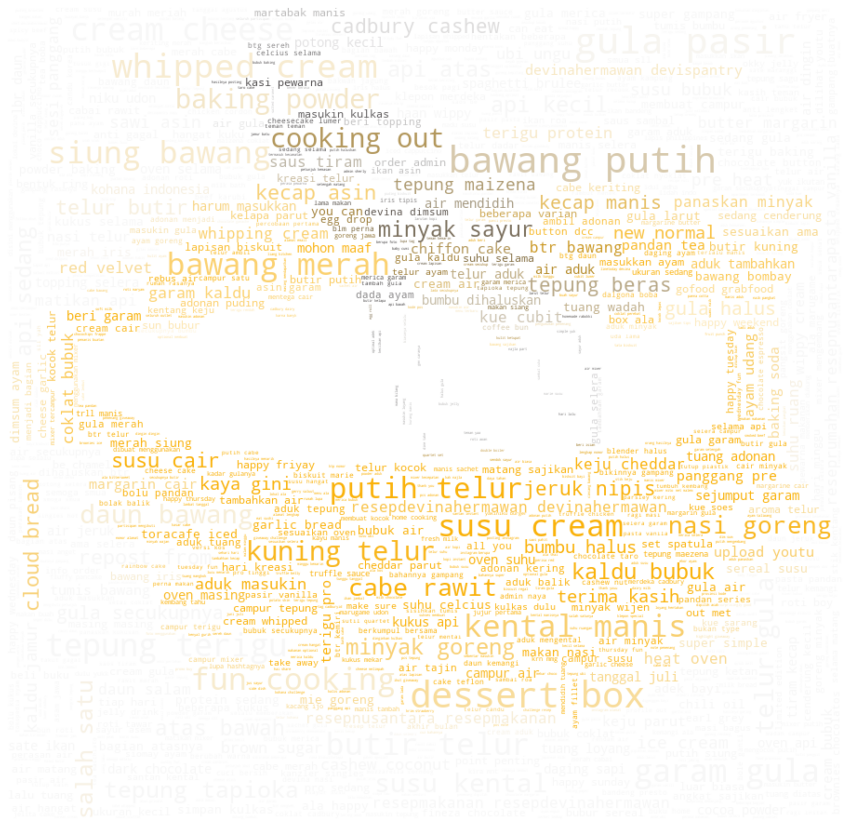

In [203]:
# create a beautiful wordcloud

stopwords = set(STOPWORDS)

w = WordCloud(width=800,height=600,background_color='white',max_words=2000).generate_from_frequencies(df_bigram.frequency)

# create coloring from image
image_colors = ImageColorGenerator(mic2)

# show
plt.figure(figsize=(15, 15))

# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")

plt.axis('off')

plt.show()